In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

License

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.


In [2]:
!pwd

/content


In [3]:
!cp /content/drive/MyDrive/ML/magicdataset.zip /content

In [4]:
!unzip magicdataset.zip

Archive:  magicdataset.zip
  inflating: magic04.data            
  inflating: magic04.names           


In [5]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df.loc[df["class"] == "g", "class"] = 1
df.loc[df["class"] == "h", "class"] = 0

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


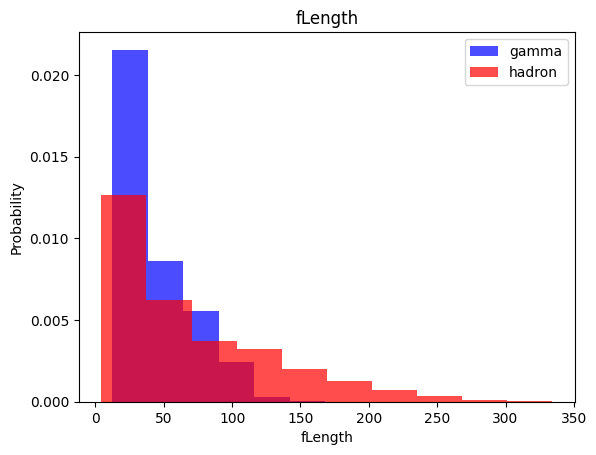

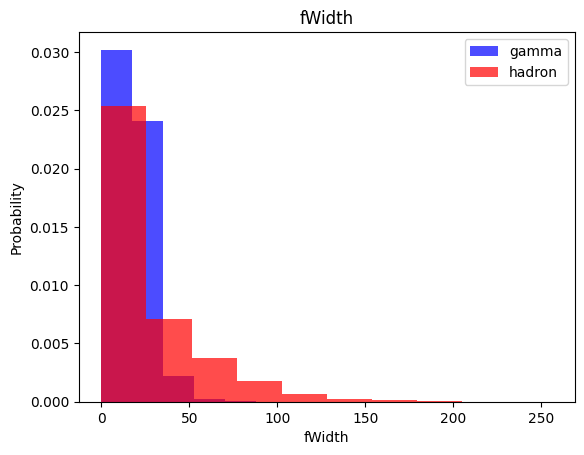

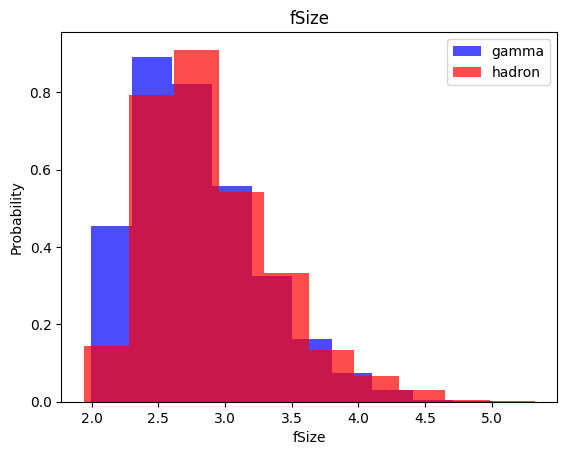

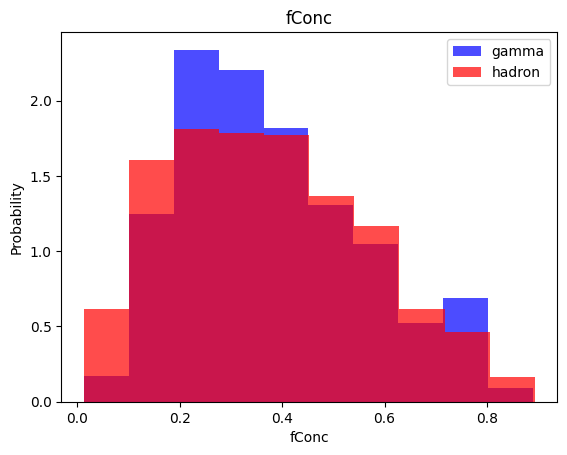

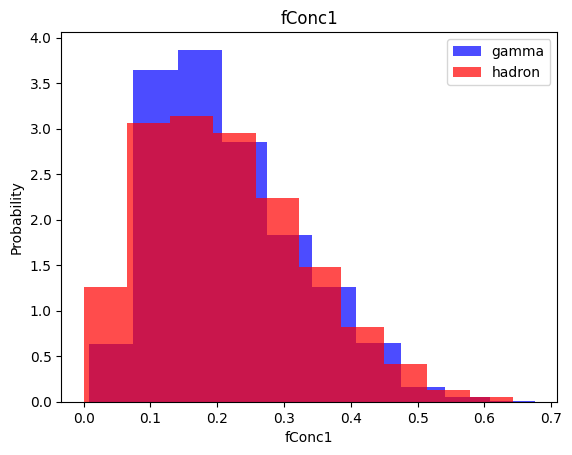

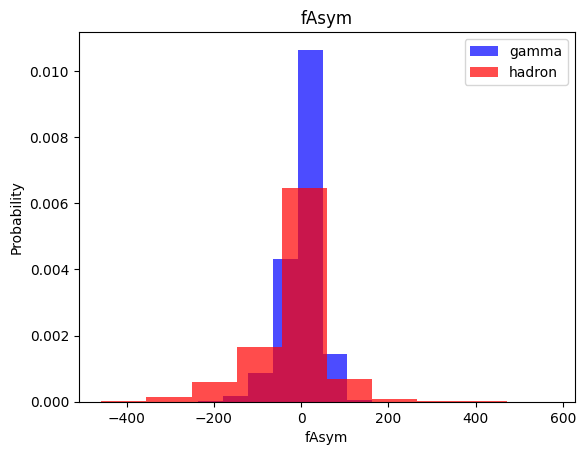

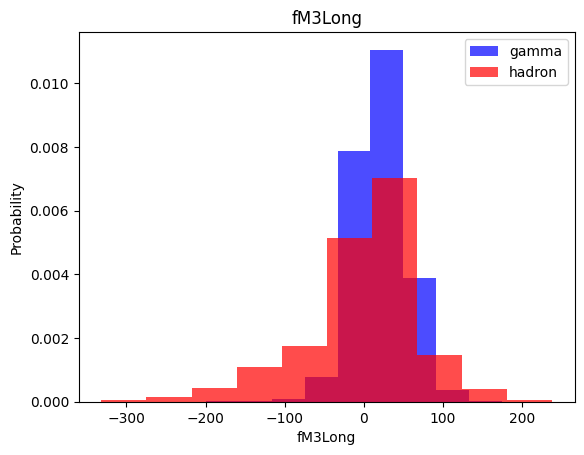

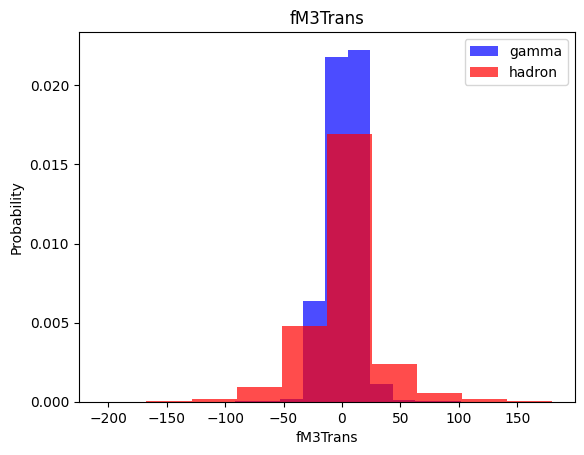

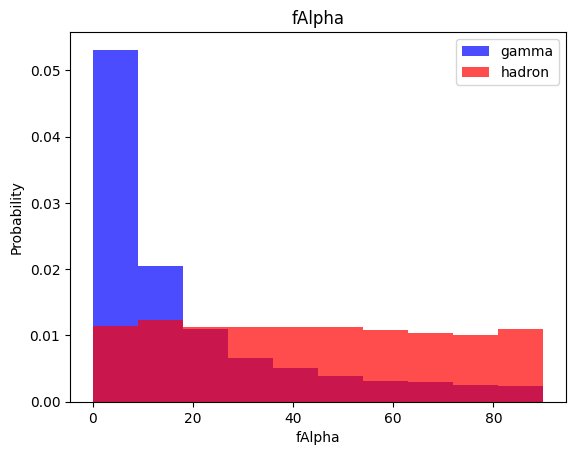

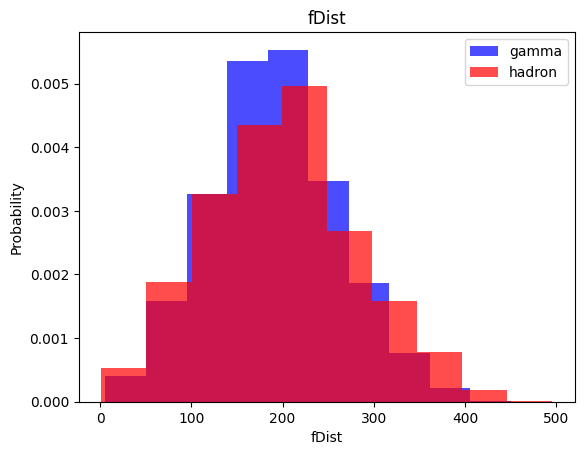

In [7]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train,Validation, Test datasets.

In [8]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [9]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Replace 'unknown' with 0
    y = np.where(y == "unknown", 0, y)
    y = y.astype(int)  # Convert labels to integers

    unique_labels = np.unique(y)
    if len(unique_labels) > 2:
        raise ValueError("Multiclass classification is not supported by this function.")

    if len(unique_labels) != 2:
        raise ValueError("Target variable must have exactly 2 unique values after preprocessing.")

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [10]:
train, X_train, y_train =scale_dataset(train,oversample=True)
valid,X_valid,y_valid = scale_dataset(valid,oversample=False)
test,X_test,y_test = scale_dataset(test,oversample=False)

In [11]:
len(y_train)

14702

In [12]:
sum(y_train==1)

7351

In [13]:
sum(y_train==0)

7351

#K-NN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn_model.predict(X_test)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1302
           1       0.85      0.86      0.86      2502

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#NAIVE BAYES
###PROBABILITY LIKE
........positive   negative.

Y   531. 6

N.  20.   9443

P(covid|positive test) = 531/551


Bayes' Rule

P(A|B) = P(B|A) . P(A)/P(B)

posterior = likelihood * prior / evidence  ...A = Ck and B is x.

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [20]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.50      1302
           1       0.74      0.89      0.81      2502

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#Logistics Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [23]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1302
           1       0.85      0.82      0.83      2502

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM

In [24]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)


In [26]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1302
           1       0.89      0.90      0.89      2502

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Network

In [27]:
import tensorflow as tf

In [28]:
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [29]:

def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation= 'relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation= 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(
    X_train,y_train,
    epochs=epochs,batch_size=batch_size,validation_split=0.2, verbose = 0
  )

  return nn_model,history

16 nodes,dropout 0, lr 0.01, batch_size 32


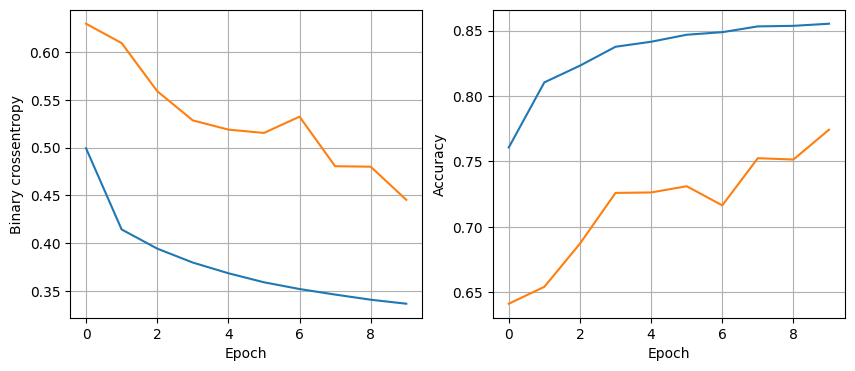

119/119 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8615
16 nodes,dropout 0, lr 0.01, batch_size 64


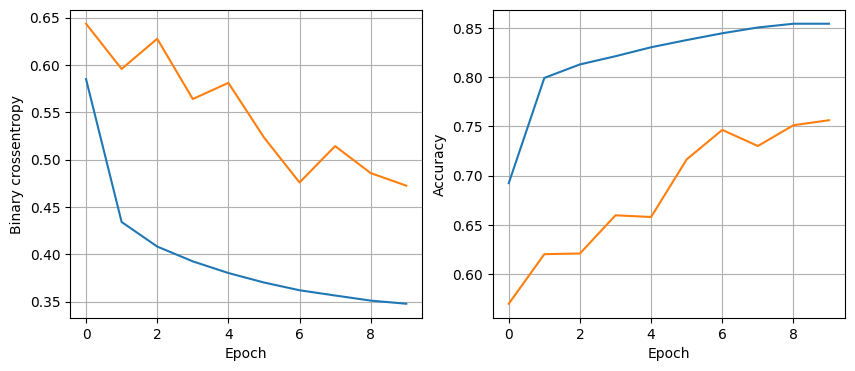

119/119 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8667
16 nodes,dropout 0, lr 0.01, batch_size 128


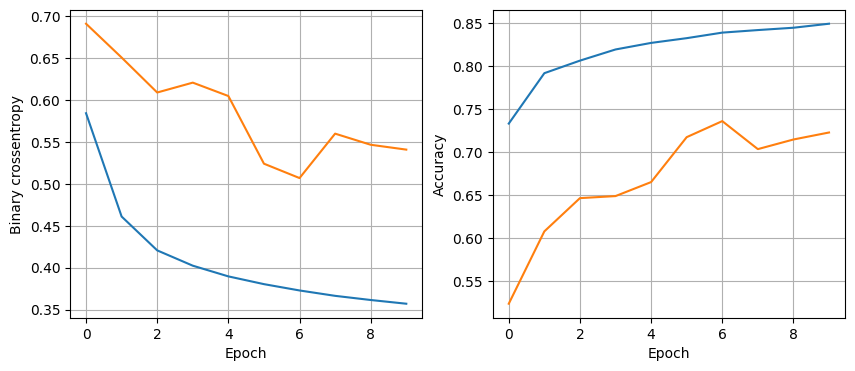

119/119 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8623
16 nodes,dropout 0, lr 0.005, batch_size 32


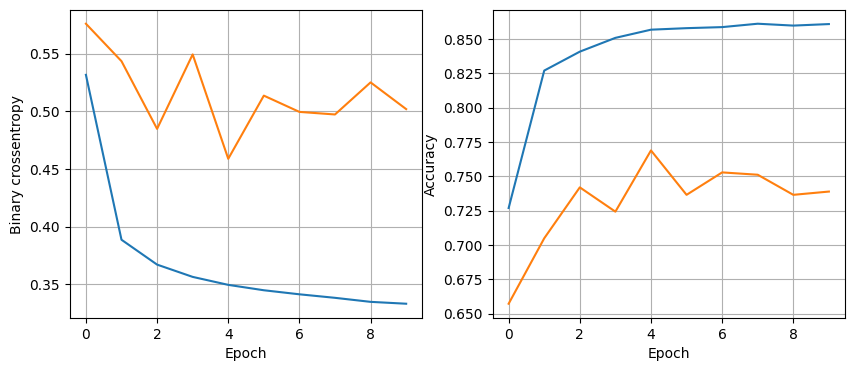

119/119 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8691
16 nodes,dropout 0, lr 0.005, batch_size 64


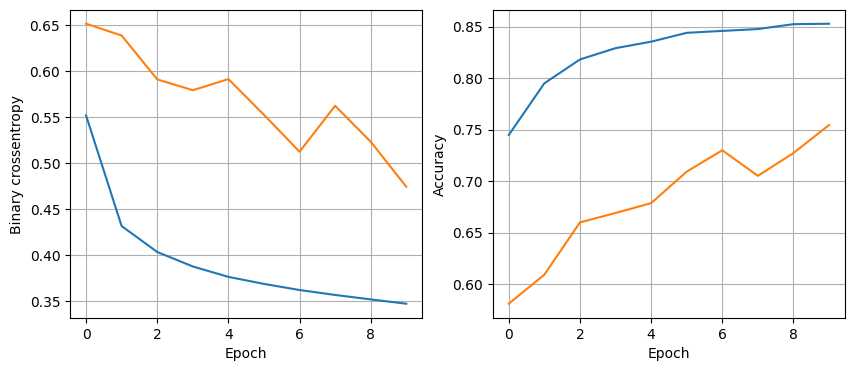

119/119 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8554
16 nodes,dropout 0, lr 0.005, batch_size 128


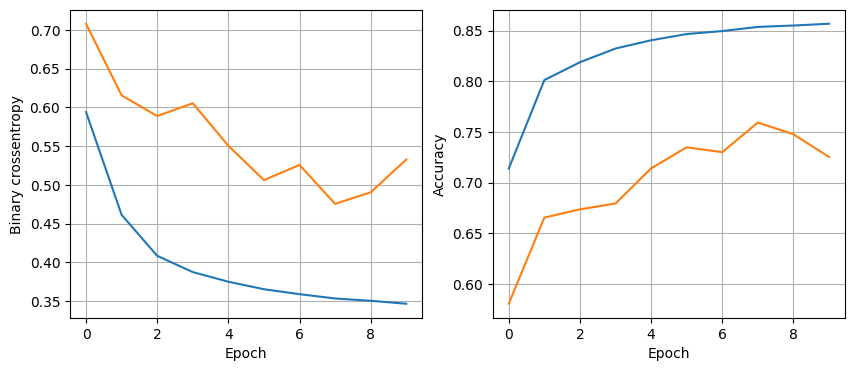

119/119 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8644
16 nodes,dropout 0, lr 0.001, batch_size 32


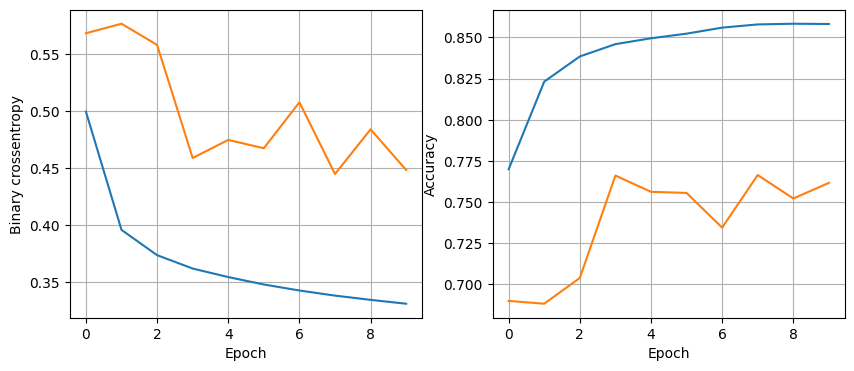

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8667
16 nodes,dropout 0, lr 0.001, batch_size 64


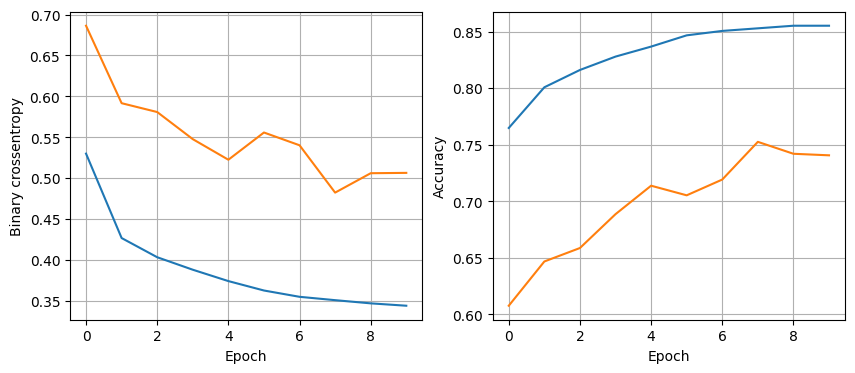

119/119 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8644
16 nodes,dropout 0, lr 0.001, batch_size 128


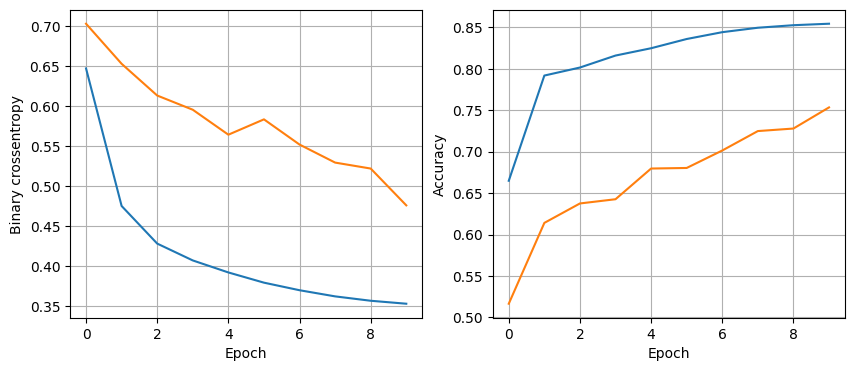

119/119 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8604
16 nodes,dropout 0.2, lr 0.01, batch_size 32


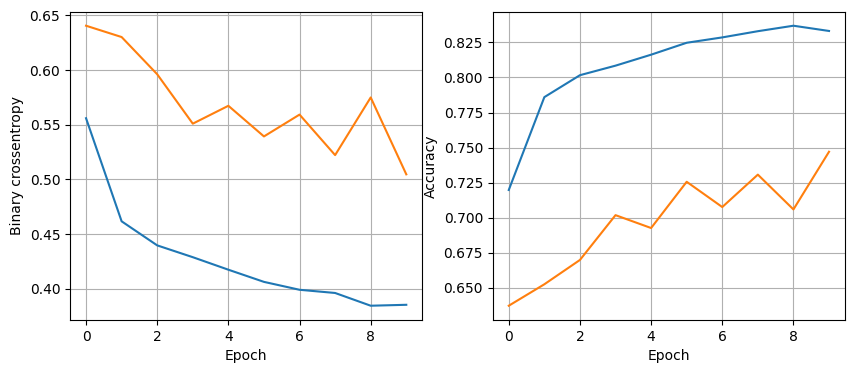

119/119 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8591
16 nodes,dropout 0.2, lr 0.01, batch_size 64


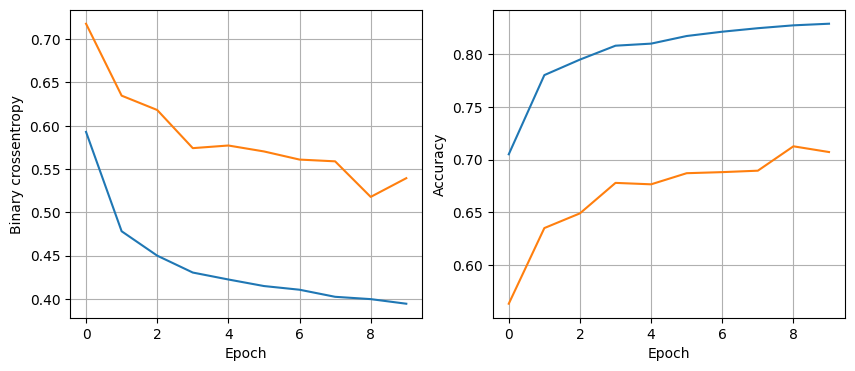

119/119 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8588
16 nodes,dropout 0.2, lr 0.01, batch_size 128


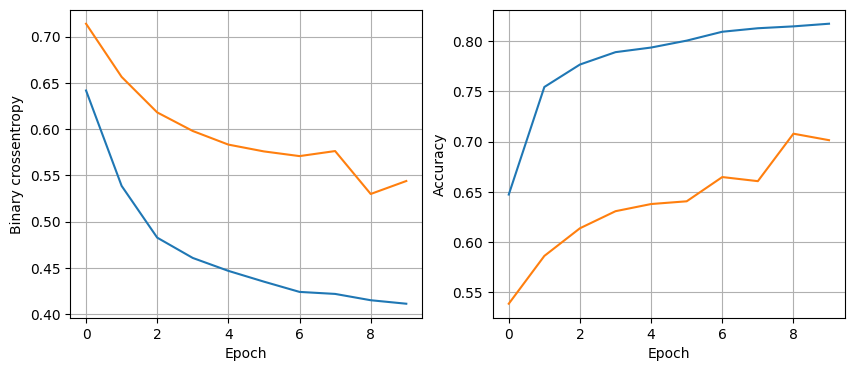

119/119 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8446
16 nodes,dropout 0.2, lr 0.005, batch_size 32


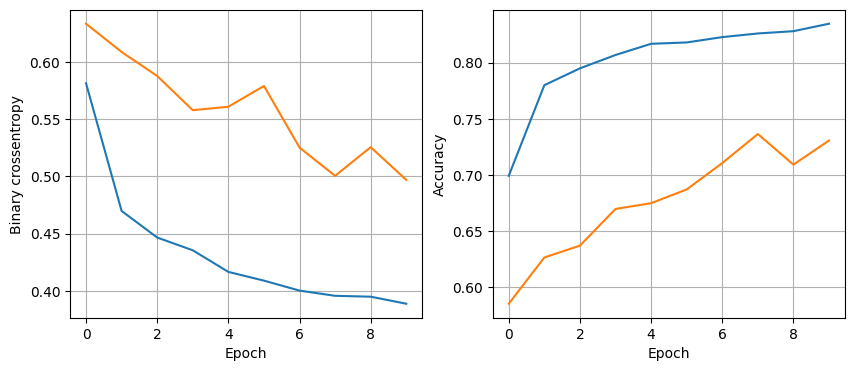

119/119 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8662
16 nodes,dropout 0.2, lr 0.005, batch_size 64


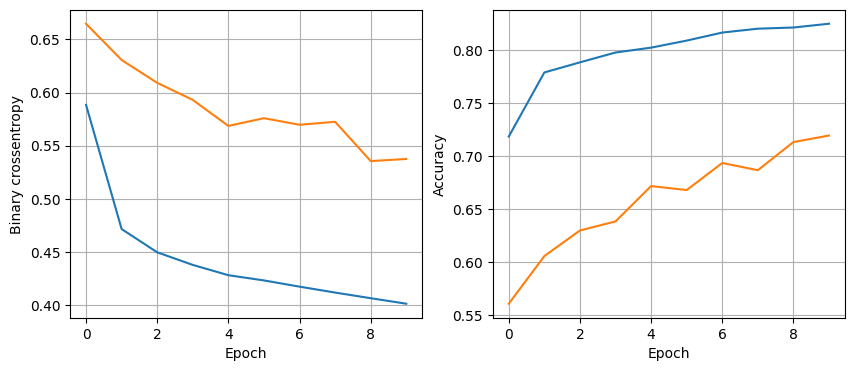

119/119 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8528
16 nodes,dropout 0.2, lr 0.005, batch_size 128


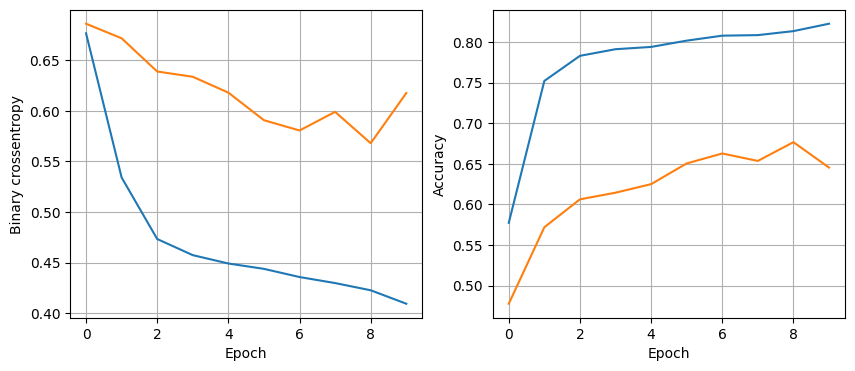

119/119 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8431
16 nodes,dropout 0.2, lr 0.001, batch_size 32


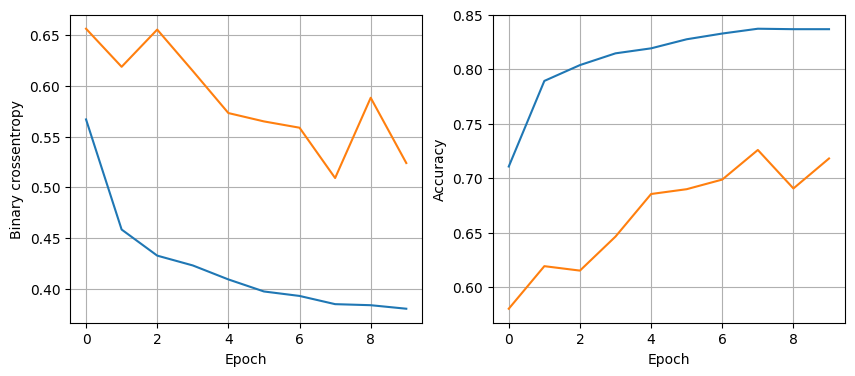

119/119 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8570
16 nodes,dropout 0.2, lr 0.001, batch_size 64


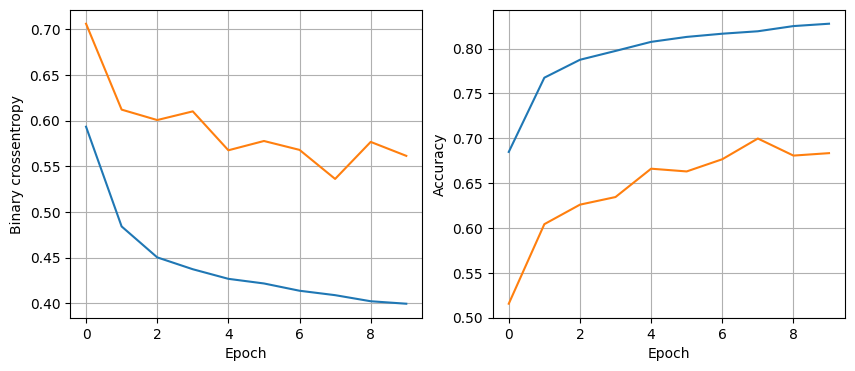

119/119 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8559
16 nodes,dropout 0.2, lr 0.001, batch_size 128


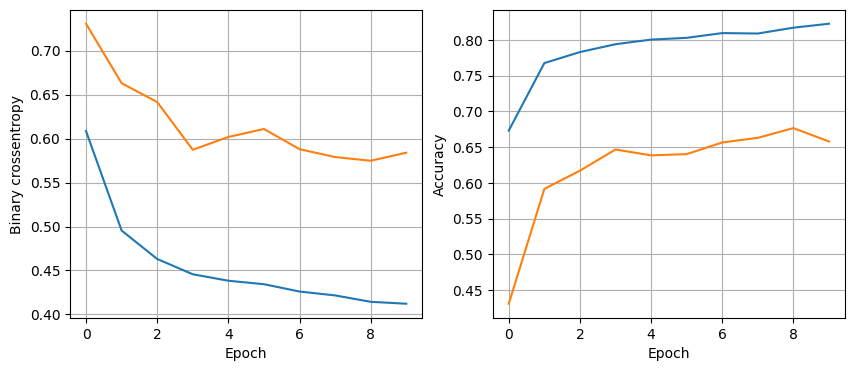

119/119 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8499
32 nodes,dropout 0, lr 0.01, batch_size 32


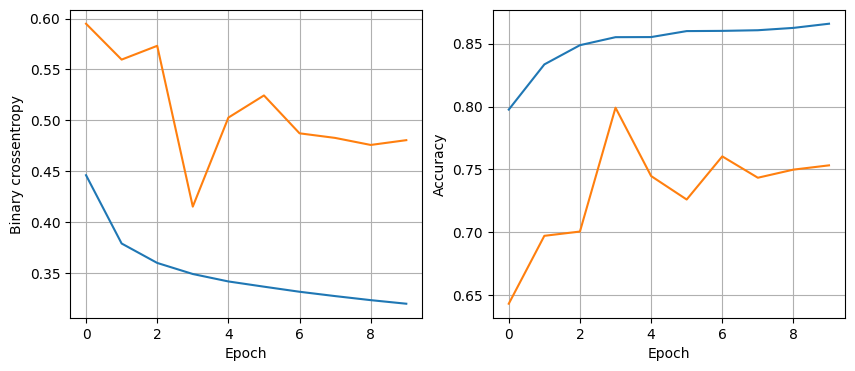

119/119 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8746
32 nodes,dropout 0, lr 0.01, batch_size 64


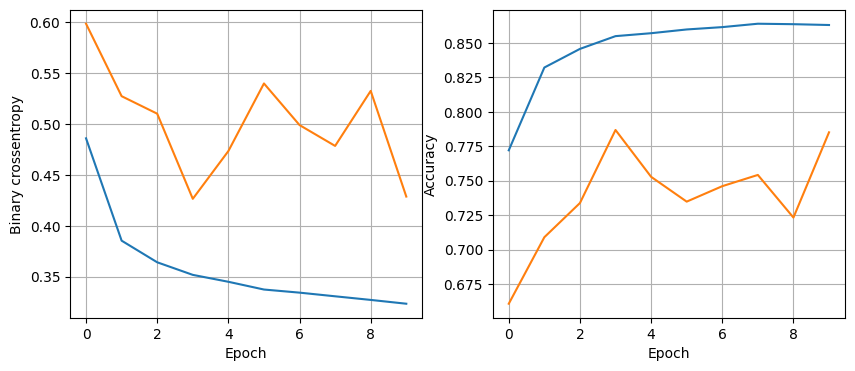

119/119 [==============================] - 0s 3ms/step - loss: 0.3129 - accuracy: 0.8688
32 nodes,dropout 0, lr 0.01, batch_size 128


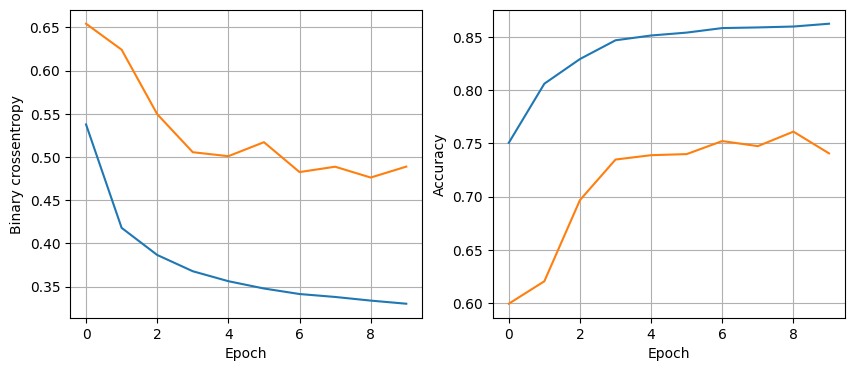

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8696
32 nodes,dropout 0, lr 0.005, batch_size 32


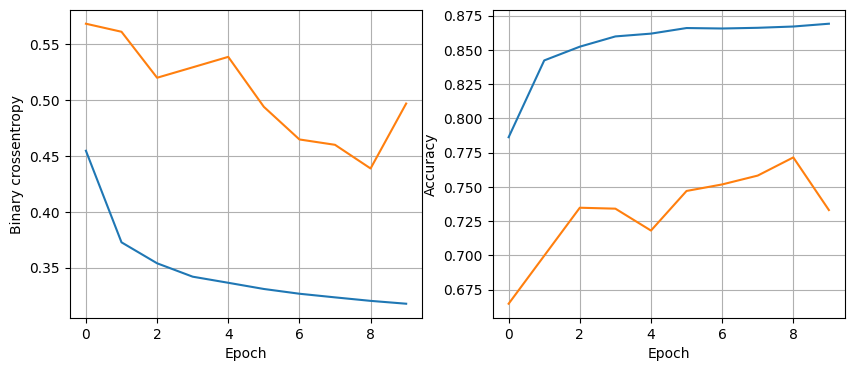

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8725
32 nodes,dropout 0, lr 0.005, batch_size 64


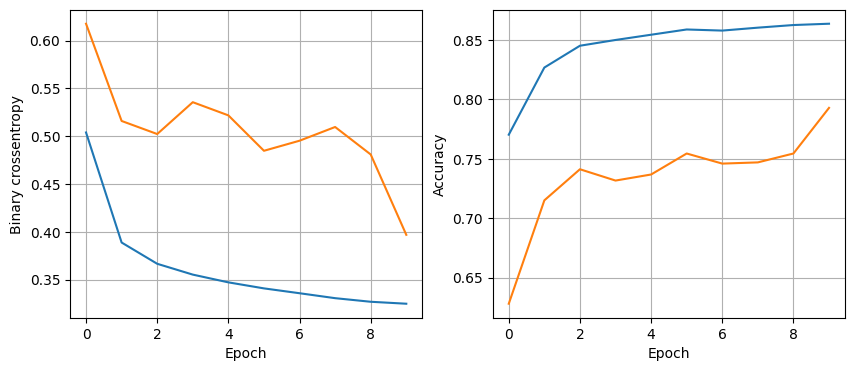

119/119 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8683
32 nodes,dropout 0, lr 0.005, batch_size 128


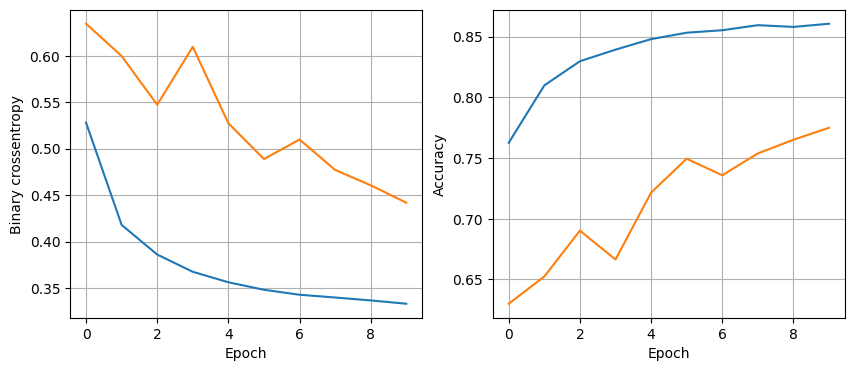

119/119 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8696
32 nodes,dropout 0, lr 0.001, batch_size 32


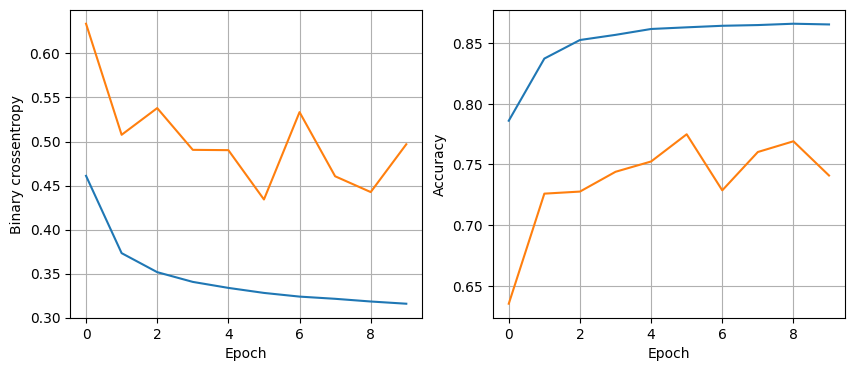

119/119 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8717
32 nodes,dropout 0, lr 0.001, batch_size 64


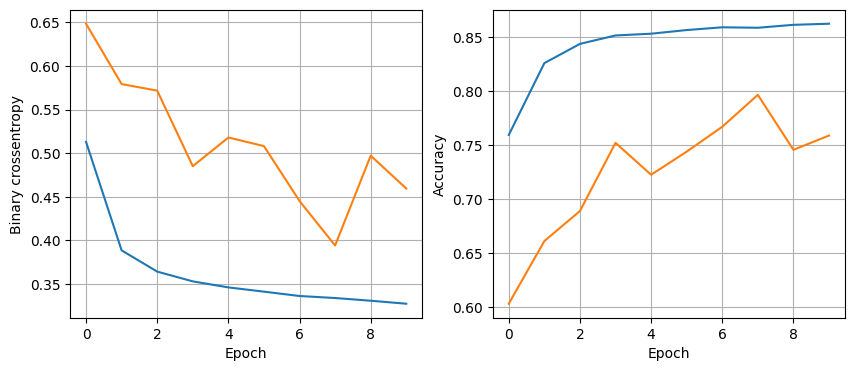

119/119 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8667
32 nodes,dropout 0, lr 0.001, batch_size 128


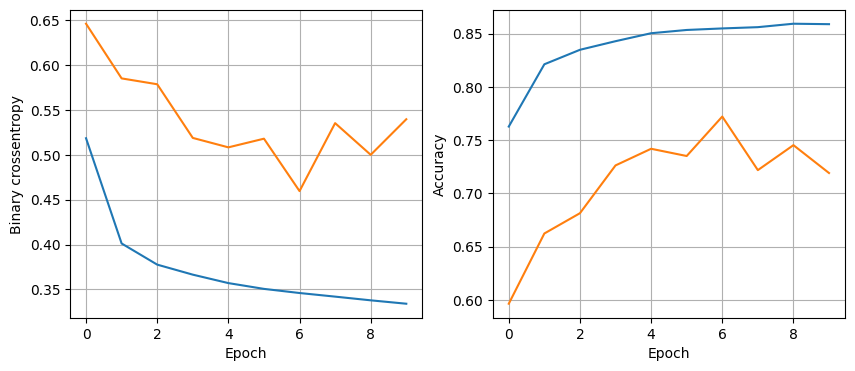

119/119 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8704
32 nodes,dropout 0.2, lr 0.01, batch_size 32


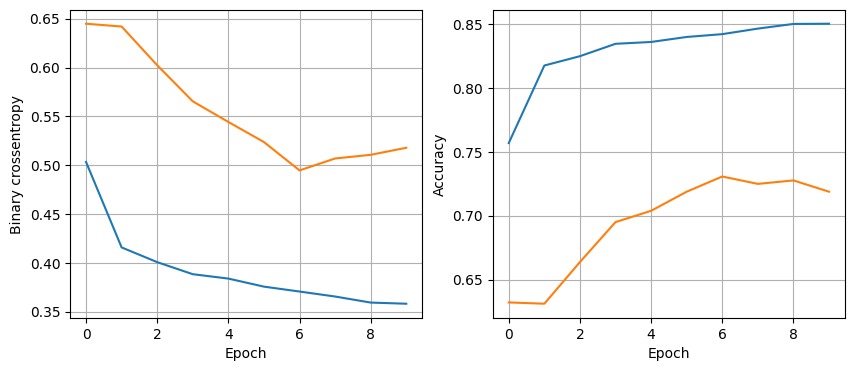

119/119 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8678
32 nodes,dropout 0.2, lr 0.01, batch_size 64


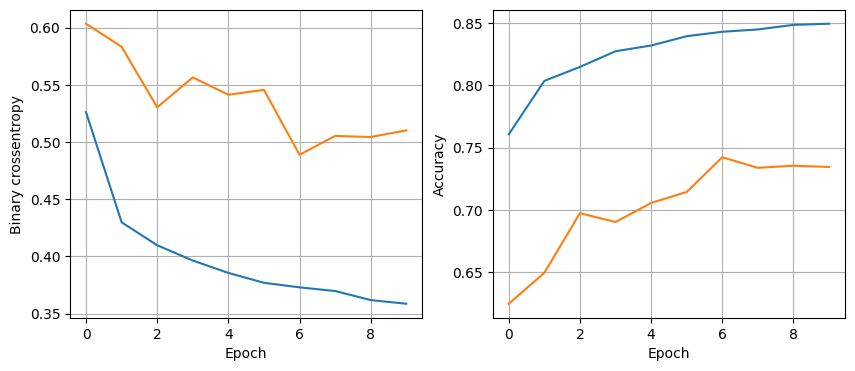

119/119 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8649
32 nodes,dropout 0.2, lr 0.01, batch_size 128


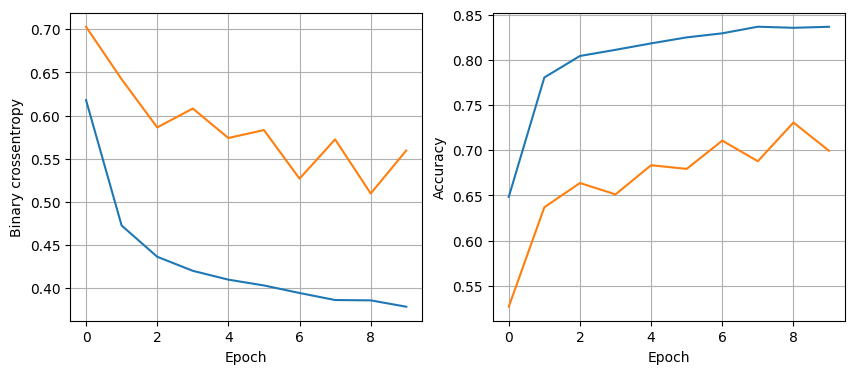

119/119 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8586
32 nodes,dropout 0.2, lr 0.005, batch_size 32


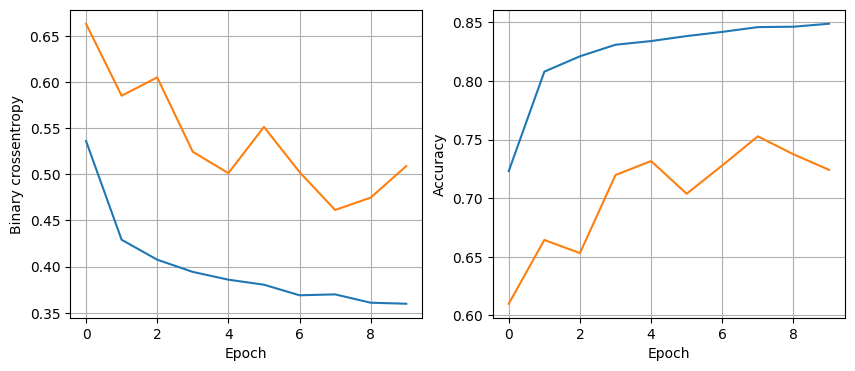

119/119 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8699
32 nodes,dropout 0.2, lr 0.005, batch_size 64


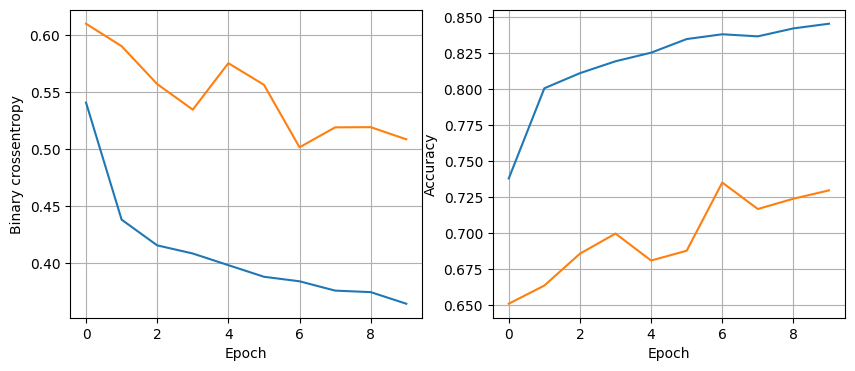

119/119 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8680
32 nodes,dropout 0.2, lr 0.005, batch_size 128


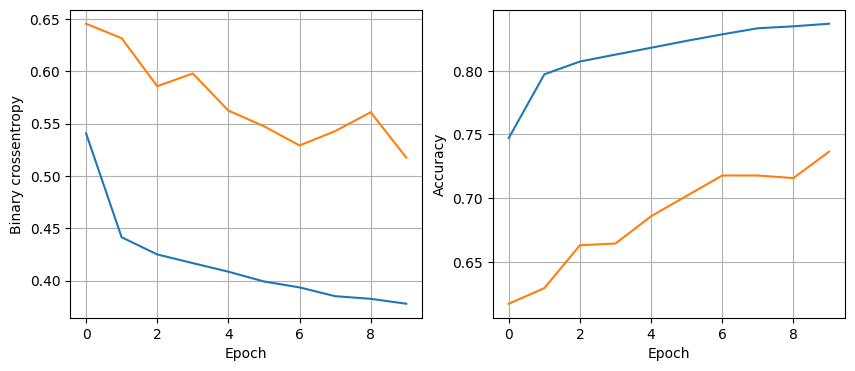

119/119 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8609
32 nodes,dropout 0.2, lr 0.001, batch_size 32


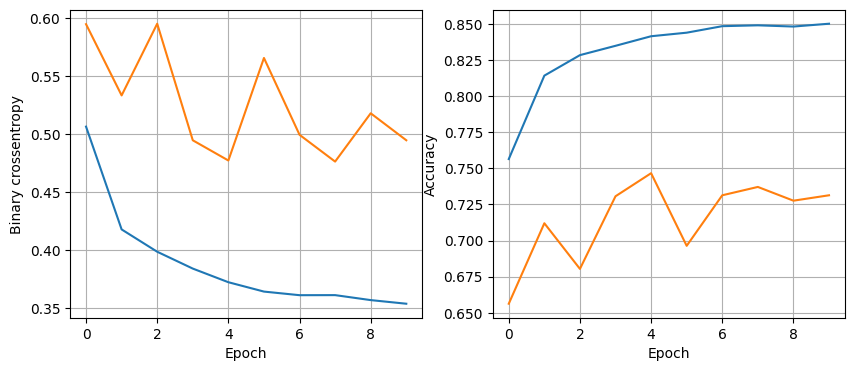

119/119 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8696
32 nodes,dropout 0.2, lr 0.001, batch_size 64


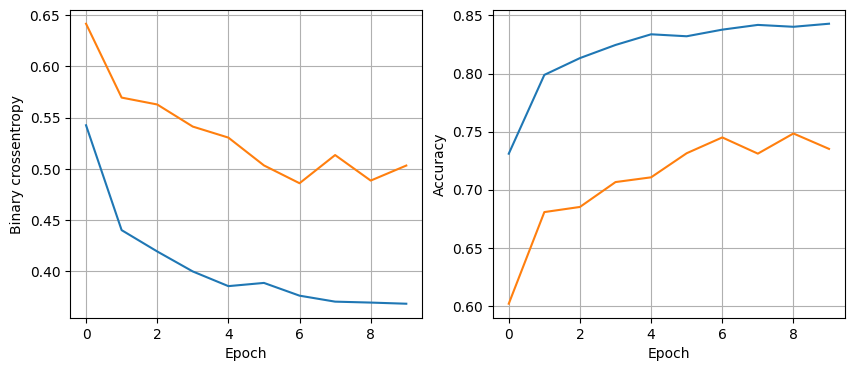

119/119 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8638
32 nodes,dropout 0.2, lr 0.001, batch_size 128


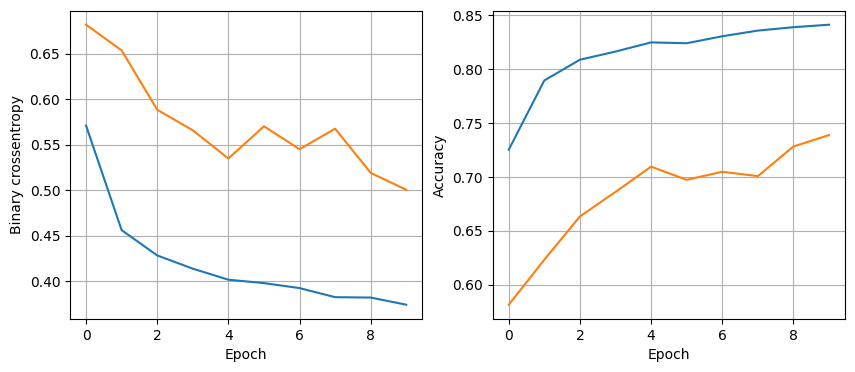

119/119 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8638
64 nodes,dropout 0, lr 0.01, batch_size 32


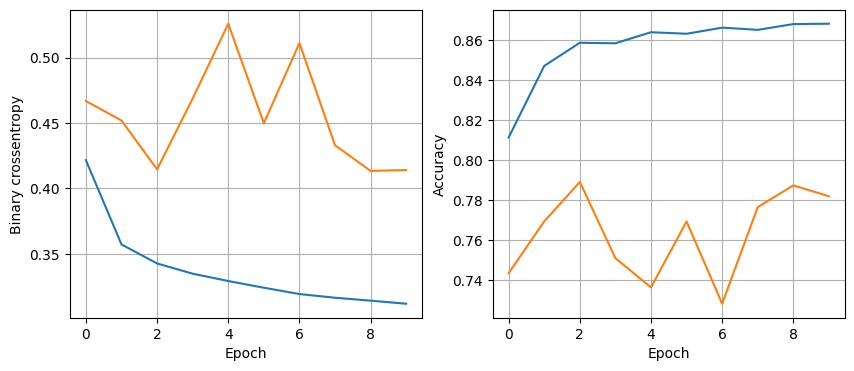

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8770
64 nodes,dropout 0, lr 0.01, batch_size 64


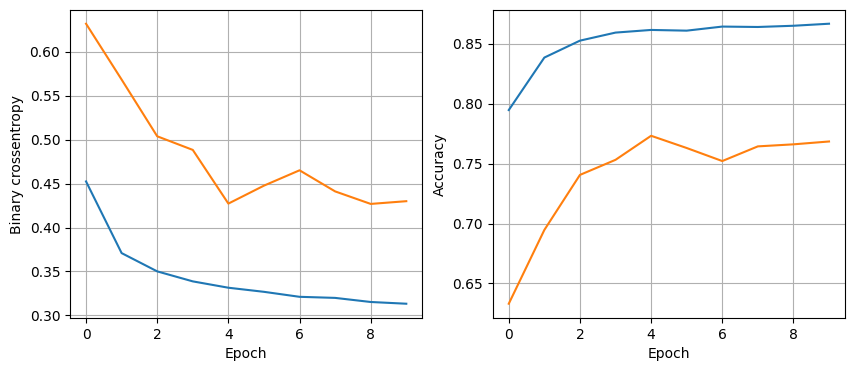

119/119 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.8720
64 nodes,dropout 0, lr 0.01, batch_size 128


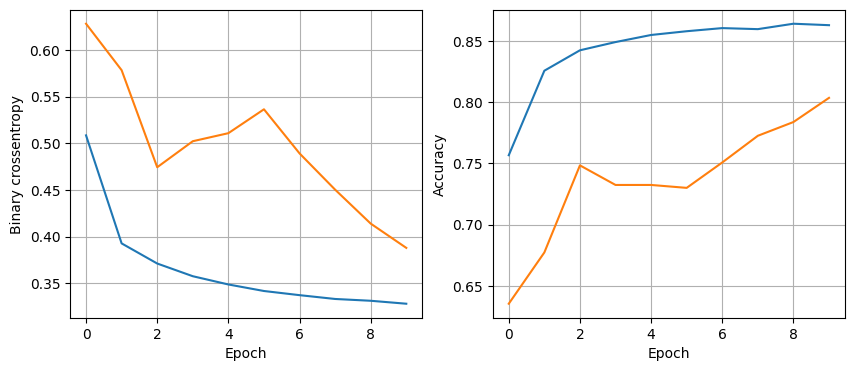

119/119 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8633
64 nodes,dropout 0, lr 0.005, batch_size 32


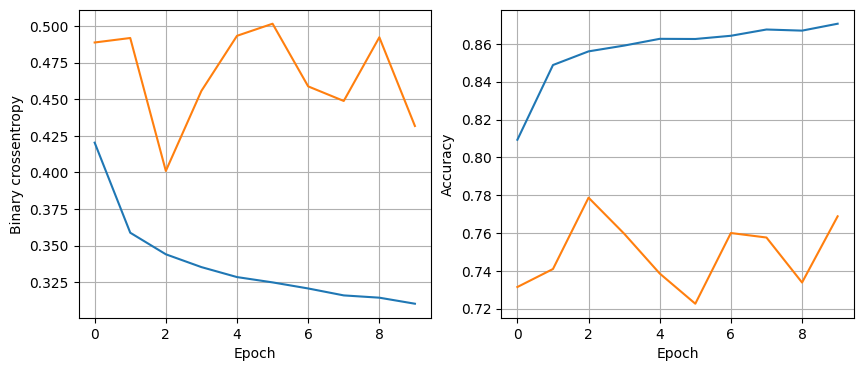

119/119 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8770
64 nodes,dropout 0, lr 0.005, batch_size 64


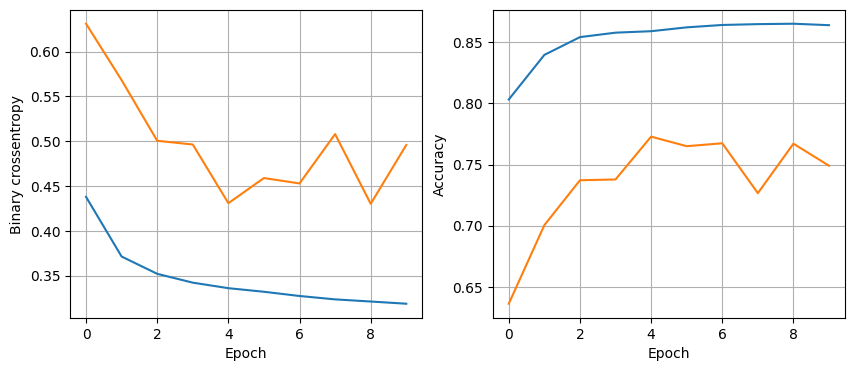

119/119 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8772
64 nodes,dropout 0, lr 0.005, batch_size 128


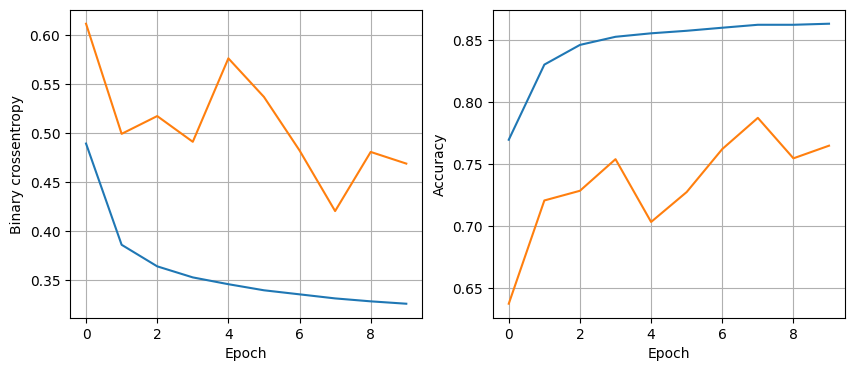

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8717
64 nodes,dropout 0, lr 0.001, batch_size 32


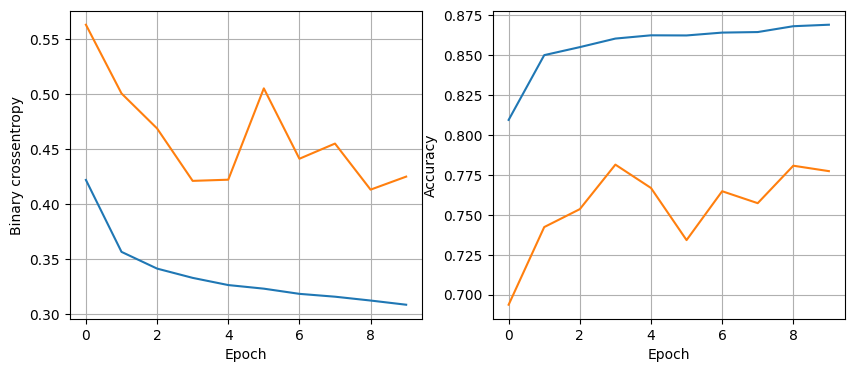

119/119 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8728
64 nodes,dropout 0, lr 0.001, batch_size 64


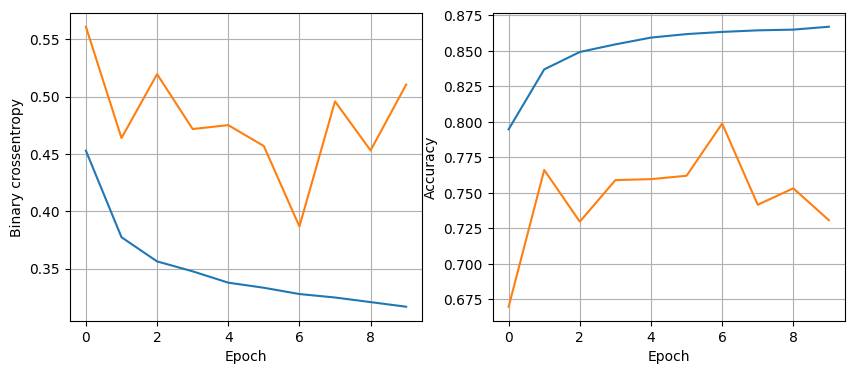

119/119 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8770
64 nodes,dropout 0, lr 0.001, batch_size 128


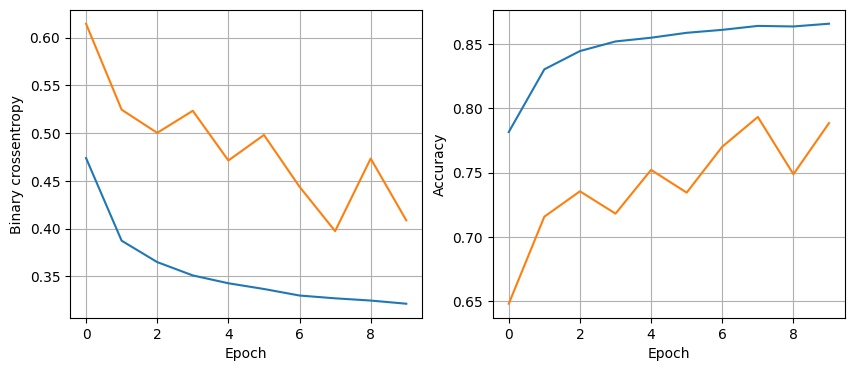

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8680
64 nodes,dropout 0.2, lr 0.01, batch_size 32


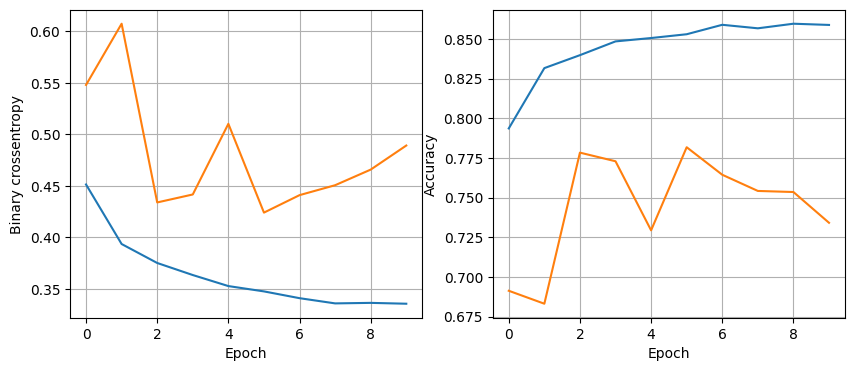

119/119 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8733
64 nodes,dropout 0.2, lr 0.01, batch_size 64


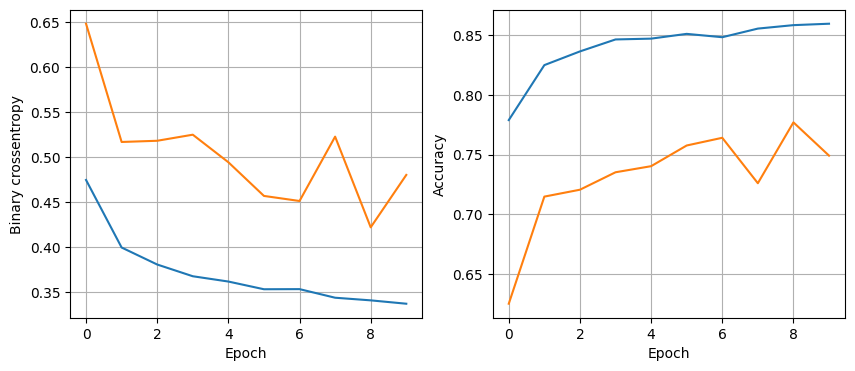

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8704
64 nodes,dropout 0.2, lr 0.01, batch_size 128


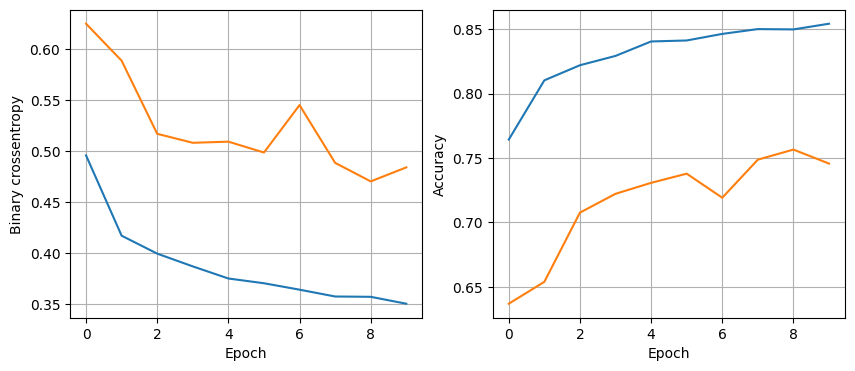

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8717
64 nodes,dropout 0.2, lr 0.005, batch_size 32


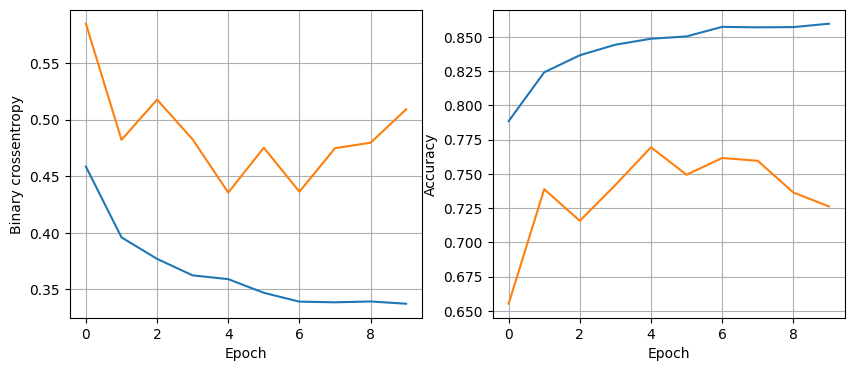

119/119 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8746
64 nodes,dropout 0.2, lr 0.005, batch_size 64


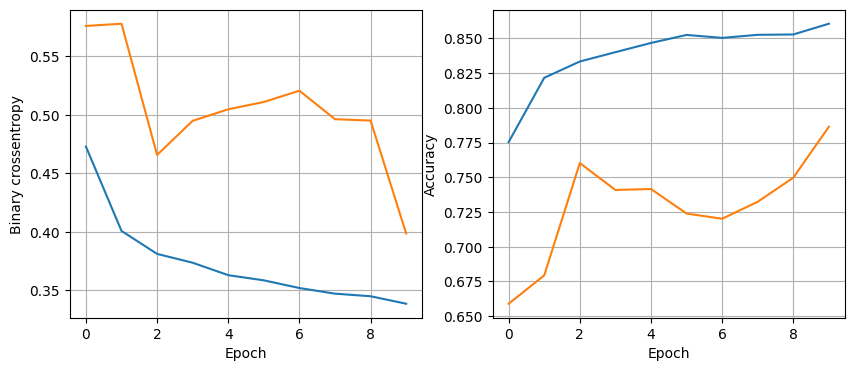

119/119 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8693
64 nodes,dropout 0.2, lr 0.005, batch_size 128


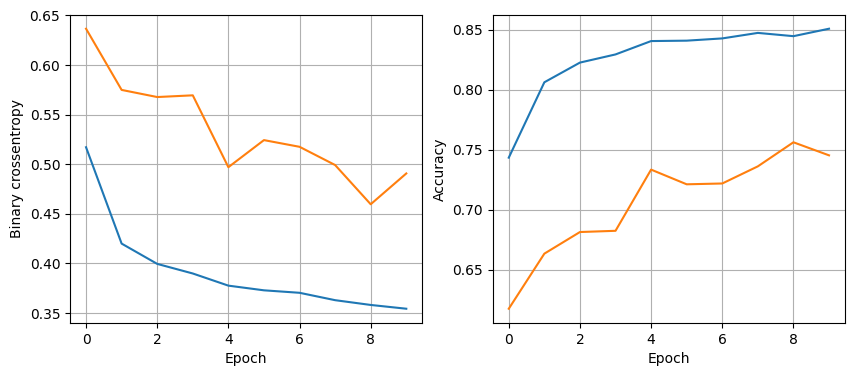

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8701
64 nodes,dropout 0.2, lr 0.001, batch_size 32


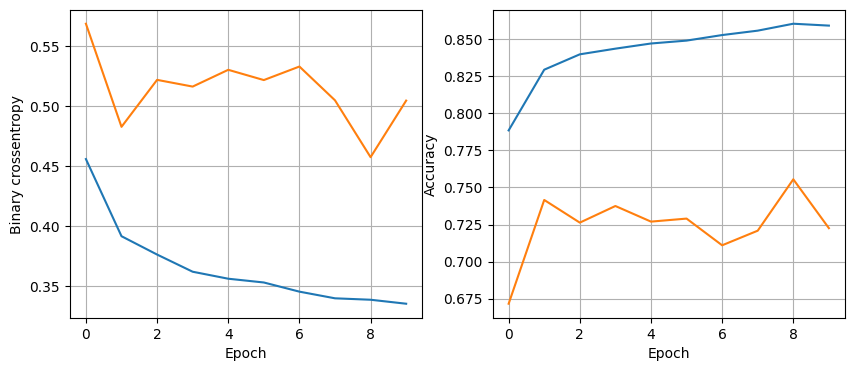

119/119 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8725
64 nodes,dropout 0.2, lr 0.001, batch_size 64


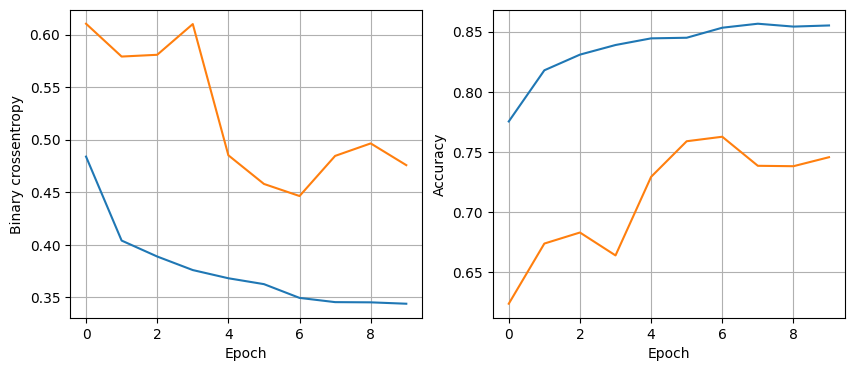

119/119 [==============================] - 0s 3ms/step - loss: 0.3100 - accuracy: 0.8701
64 nodes,dropout 0.2, lr 0.001, batch_size 128


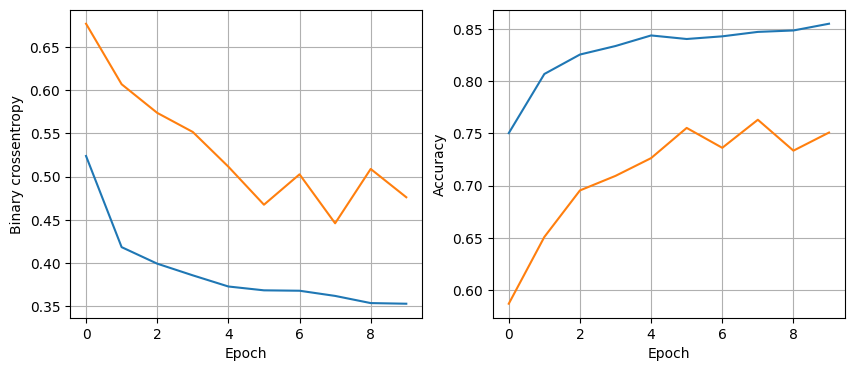

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8725


In [30]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes,dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model,history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


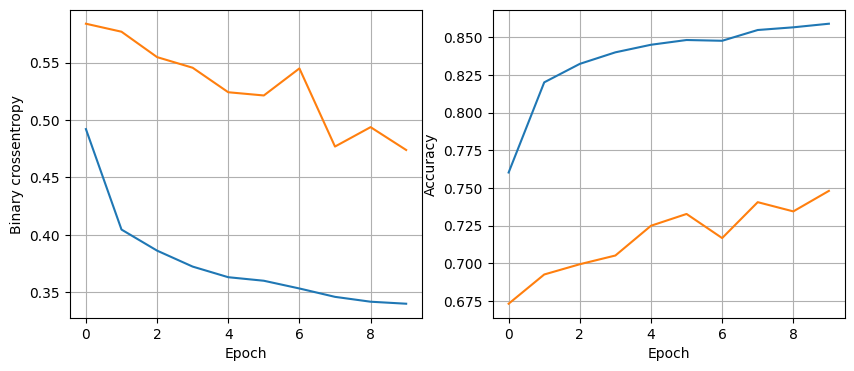

119/119 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8728


In [31]:
model,history = train_model(X_train,y_train,64,0.2,0.001,64,10)
plot_history(history)
val_loss = model.evaluate(X_valid,y_valid)[0]
least_loss_model = model

In [32]:
y_pred = least_loss_model.predict(X_test)
y_pred= (y_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [33]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1302
           1       0.87      0.93      0.90      2502

    accuracy                           0.86      3804
   macro avg       0.86      0.83      0.84      3804
weighted avg       0.86      0.86      0.86      3804

